# FFT of acceleration data

Discrete Fourier transform will be used for analyzing data of bycicle wheel slips provided by Ákos Vinkó.

First 0.01 s interpolated acceleration data are read from file  `aint.dat`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper function for plotting:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
data = np.loadtxt('aint.txt')
nd = data.shape[0]
# number of data:
nd

7029

Select and plot first 7028 data ($a_x$ is the tangential, $a_y$ is the radial component of acceleration).

<Figure size 432x288 with 0 Axes>

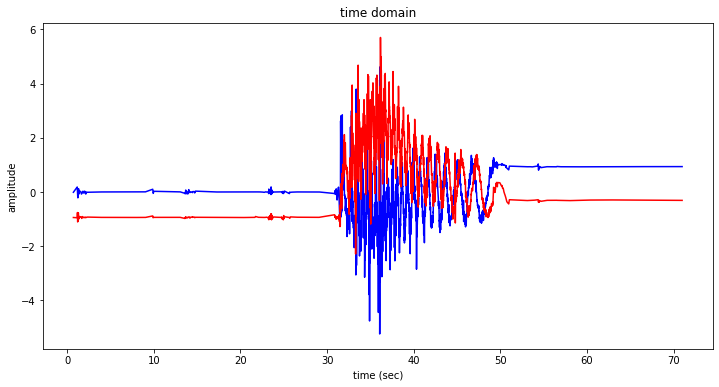

In [2]:
t  = data[:7028,0]
ax = data[:7028,1]
ay = data[:7028,2]
plt.figure()
setup_graph(title='time domain', x_label='time (sec)', y_label='amplitude', fig_size=(12,6))
plt.plot(t,ax,'b-')
plt.plot(t,ay,'r-')

### Discrete Fourier transform

Real FFT and magnitude of the transform are calculated for both components.

In [3]:
Ax = np.fft.rfft(ax)
Ay = np.fft.rfft(ay)

Axm = [np.sqrt(i.real**2 + i.imag**2)/len(Ax) for i in Ax]
Aym = [np.sqrt(i.real**2 + i.imag**2)/len(Ay) for i in Ay]

# frequency axis
frq = [(i*1.0/nd)*100 for i in range(nd//2+1)]

Plot magnitude

<Figure size 432x288 with 0 Axes>

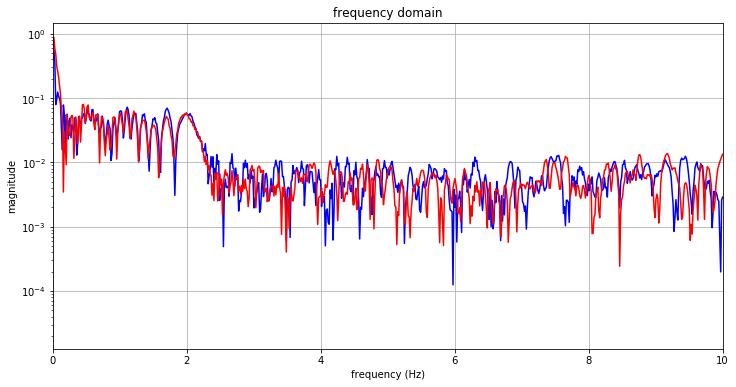

In [4]:
plt.figure()
setup_graph(title='frequency domain', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.semilogy(frq,Axm,'b-')
plt.semilogy(frq,Aym,'r-')
plt.xlim(0,10)
plt.grid()

Let us see the effect of Blackman tapering:

<Figure size 432x288 with 0 Axes>

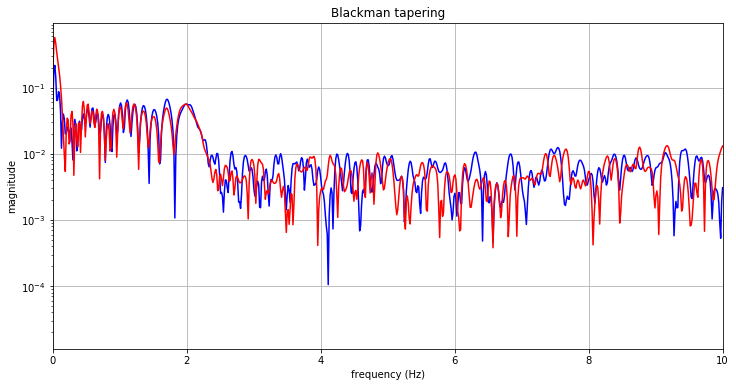

In [5]:
from scipy.signal import blackman
N = len(t)
w = blackman(N)
Ax = np.fft.rfft(ax*w)
Ay = np.fft.rfft(ay*w)

Axm = np.abs(Ax)/len(Ax)
Aym = np.abs(Ay)/len(Ay)

plt.figure()
setup_graph(title='Blackman tapering', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.semilogy(frq,Axm,'b-')
plt.semilogy(frq,Aym,'r-')
plt.xlim(0,10)
plt.grid()